### Introduction

We are going to focus highly on genre's. 

Here are some things I want to look at:

### Research Questions (Q):
1. Which genres are the most common (number of movies made)?
2. Which genres have high avg. budget and revenue?
3. Which genres have high avg. profit?
4. Which genres have hihg avg. popularity?
5. Which genres have highest number of movies with a voting avg. >=8?

### Research Hypotheses (H):
1. The best movies according to the vote avg. return high profit and revenue.
2. The best movies according to popularity return high profit and revenue.
3. Highly budgeted movies return high revenue and profit.
4. Highly budgeted mvoies have a high popularity. 

In [50]:
import pandas as pd

movies = pd.read_csv(r'C:\Users\TINA\Desktop\Projects\Panda\imdb_movies.csv')

In [11]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10842 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10842 non-null  int64  
 1   imdb_id               10834 non-null  object 
 2   popularity            10842 non-null  float64
 3   budget                10842 non-null  int64  
 4   revenue               10842 non-null  int64  
 5   original_title        10842 non-null  object 
 6   cast                  10767 non-null  object 
 7   homepage              2931 non-null   object 
 8   director              10800 non-null  object 
 9   tagline               8036 non-null   object 
 10  keywords              9367 non-null   object 
 11  overview              10839 non-null  object 
 12  runtime               10842 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9826 non-null   object 
 15  release_date          10

In [51]:
pd.set_option('display.max.rows', 11000)
pd.set_option('display.max.columns', 22)

In [13]:
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360


In [9]:
movies[movies.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [8]:
movies.drop_duplicates(inplace = True)

In [10]:
movies.dropna(subset = ['genres'], inplace = True)

In [12]:
movies['profit'] = movies['revenue'] - movies['budget']

In [64]:
movies_genre = movies[['popularity','budget','revenue','original_title','runtime','genres','release_year','vote_count','vote_average','profit']]

In [15]:
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,1316249360


In [16]:
from pandas import Series, DataFrame

In [65]:
split = movies_genre['genres'].str.split('|').apply(Series,1).stack()
split.index = split.index.droplevel(-1)
split.name = 'genres_split'
del movies_genre['genres']
movies_genre = movies_genre.join(split)

C:\Users\TINA\AppData\Local\Temp\ipykernel_21876\1831005858.py:1: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  split = movies_genre['genres'].str.split('|').apply(Series,1).stack()


In [66]:
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,release_year,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,2015,6185,7.100000,228436354,Action


### Research Questios (Q):
1. Which genres are the most common (number of movies made)?

In [28]:
genres_count = pd.DataFrame(movies_genre.groupby('genres_split').original_title.nunique()).sort_values('original_title', ascending = True)

In [29]:
genres_count

,original_title
genres_split,
Western,163
TV Movie,167
Foreign,188
War,269
History,331
Music,403
Documentary,520
Animation,697
Mystery,796


<Axes: title={'center': 'Movies Per Genre in %'}, ylabel='original_title'>

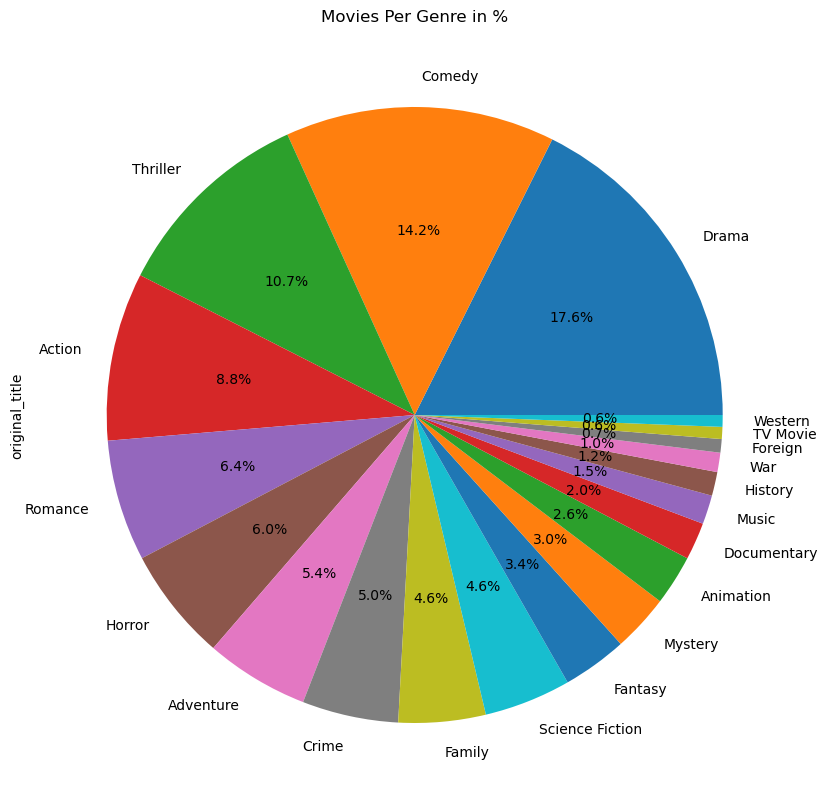

In [27]:
genres_count['original_title'].plot.pie(title = 'Movies Per Genre in %', autopct = '%1.1f%%', figsize = (10,10))

<Axes: title={'center': 'Movies Per Genre in %'}, ylabel='genres_split'>

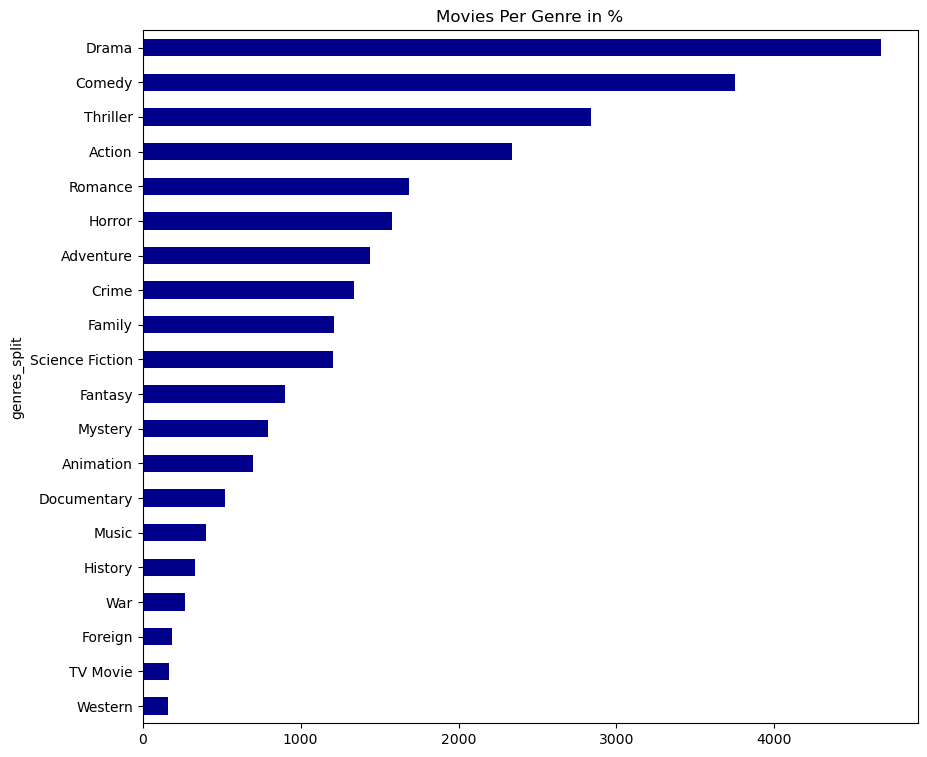

In [30]:
genres_count['original_title'].plot.barh(title = 'Movies Per Genre in %', color = 'DarkBlue', figsize = (10,9))

2. Which genres have high avg. budget and revenue?

In [34]:
# Select only numeric columns
numeric_cols = movies_genre.select_dtypes(include='number')

# Group by genre and calculate mean only for numeric columns
genres_avg = movies_genre.groupby('genres_split')[numeric_cols.columns].mean()

# Change the format from Scientific to Float
pd.options.display.float_format = '{:2f}'.format
genres_avg

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
genres_split,,,,,,,
Action,0.926274,27727820.331376,72794732.002517,104.917785,392.993708,5.787752,45066911.671141
Adventure,1.154259,37543694.530931,113137861.069341,106.173351,513.125085,5.940585,75594166.538409
Animation,0.852182,23159781.606581,75256062.223176,68.181688,303.000000,6.403147,52096280.616595
Comedy,0.592607,13297915.618244,37526242.072238,96.745057,176.436330,5.905167,24228326.453994
Crime,0.744930,17663801.124815,42368661.645495,106.917282,278.805022,6.124889,24704860.520679
Documentary,0.181432,577149.148077,2041106.994231,102.651923,35.105769,6.908462,1463957.846154
Drama,0.591495,11880717.773529,29232255.725840,110.478151,182.544538,6.165546,17351537.952311
Family,0.786668,23359337.420796,72433176.373680,89.603574,272.320877,5.997563,49073838.952884
Fantasy,0.992840,32612585.348253,96313657.081878,100.736900,420.741266,5.863537,63701071.733624


In [36]:
genres_avg.sort_values('budget',ascending = True, inplace = True)

<Axes: title={'center': 'Budget and Revenue Per Genre'}, ylabel='genres_split'>

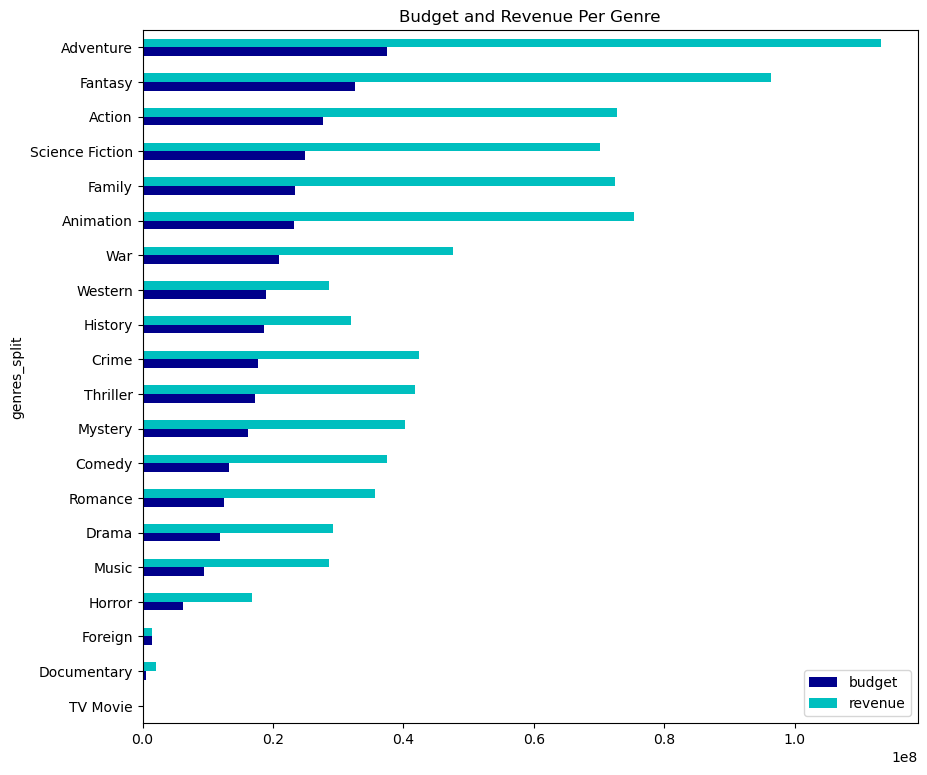

In [37]:
genres_avg[['budget','revenue']].plot.barh(title = 'Budget and Revenue Per Genre', color = ('DarkBlue','c'), figsize = (10,9))

3. Which genres have high avg. profit?

In [39]:
genres_avg.sort_values('profit',ascending = True, inplace = True)

<Axes: title={'center': 'Profit Per Genre'}, ylabel='genres_split'>

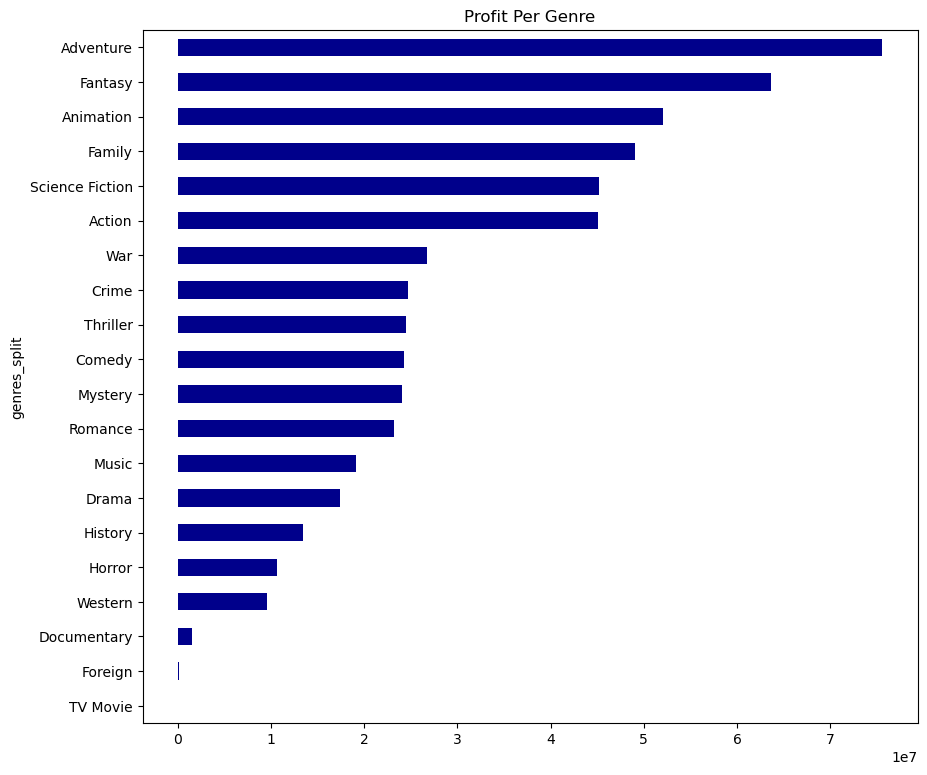

In [40]:
genres_avg['profit'].plot.barh(title = 'Profit Per Genre', color = 'DarkBlue', figsize = (10,9))

4. Which genres have high avg. popularity?

In [41]:
genres_avg.sort_values('popularity',ascending = True, inplace = True)

<Axes: title={'center': 'Popularity Per Genre'}, ylabel='genres_split'>

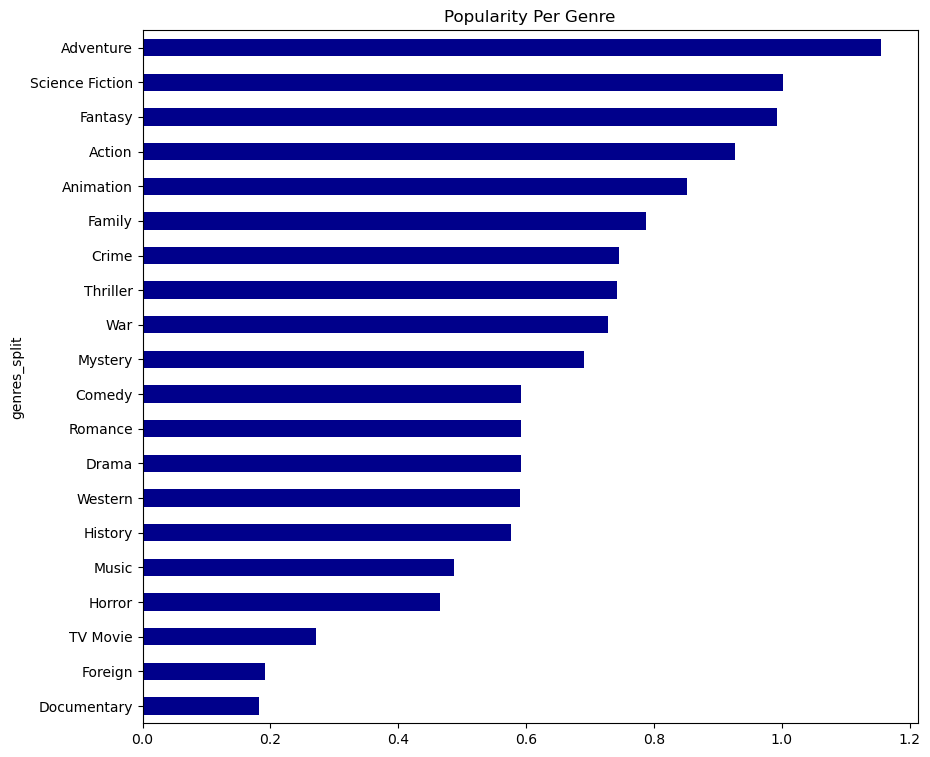

In [42]:
genres_avg['popularity'].plot.barh(title = 'Popularity Per Genre', color = 'DarkBlue', figsize = (10,9))

5. Which genres have highest number of movies with a voting avg. >=8?

In [44]:
vote_fifty = movies_genre[(movies_genre['vote_count'] >= 50) & (movies_genre['vote_average'] >= 8)]
vote_zero = movies_genre[movies_genre['vote_average'] >= 8]

In [47]:
genres_vote = pd.DataFrame(vote_zero.groupby('genres_split').vote_average.nunique()).sort_values('vote_average', ascending = True)

<Axes: title={'center': 'Vote Average Per Genre'}, ylabel='genres_split'>

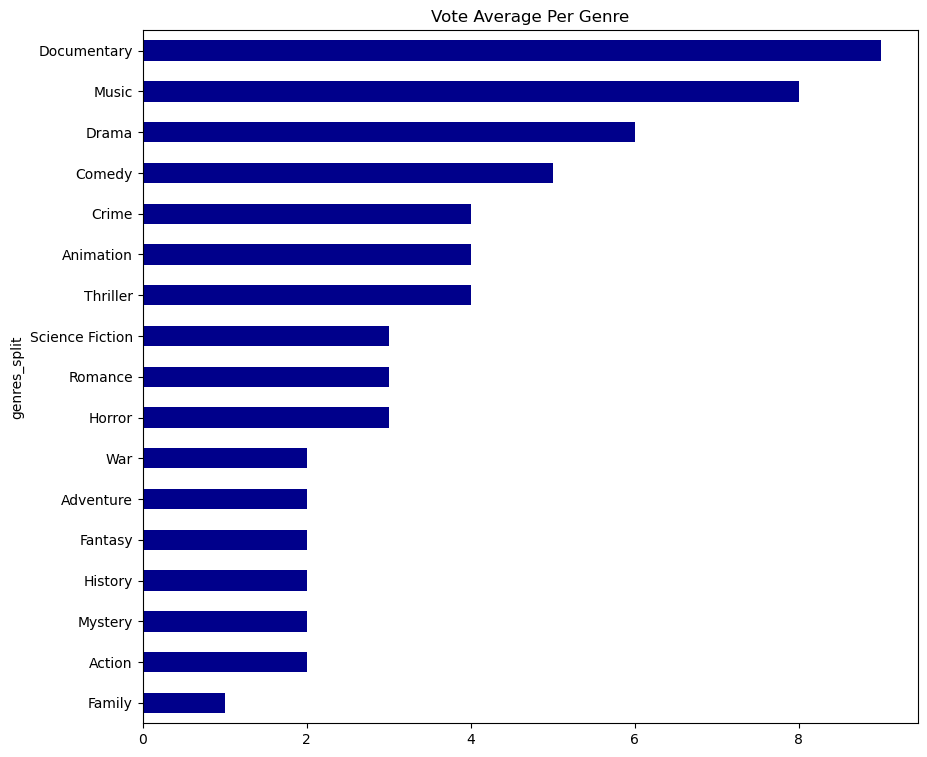

In [48]:
genres_vote['vote_average'].plot.barh(title = 'Vote Average Per Genre', color = 'DarkBlue', figsize = (10,9))

### Research Hypotheses (H):
1. The best movies according to the vote avg. return high profit and revenue.


In [52]:
movies.dropna(subset = ['genres'], inplace = True)
movies['profit'] = movies['revenue'] - movies['budget']
movies_genre = movies[['popularity','budget','revenue','original_title','runtime','genres','release_date','vote_count','vote_average','profit']]

In [53]:
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.500000,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.100000,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.300000,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.500000,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.300000,1316249360


In [56]:
movies_counted = movies_genre[movies_genre['vote_count'] >= 50]

movies_corr = movies_counted.select_dtypes(include='number').corr(method='spearman')
movies_corr

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
popularity,1.000000,0.484838,0.588588,0.230285,0.768870,0.189328,0.498078
budget,0.484838,1.000000,0.714566,0.359824,0.554290,-0.044236,0.333998
revenue,0.588588,0.714566,1.000000,0.341570,0.682540,0.112413,0.842196
runtime,0.230285,0.359824,0.341570,1.000000,0.263232,0.286280,0.212172
vote_count,0.768870,0.554290,0.682540,0.263232,1.000000,0.285173,0.583578
vote_average,0.189328,-0.044236,0.112413,0.286280,0.285173,1.000000,0.199008
profit,0.498078,0.333998,0.842196,0.212172,0.583578,0.199008,1.000000


<Axes: xlabel='vote_average', ylabel='profit'>

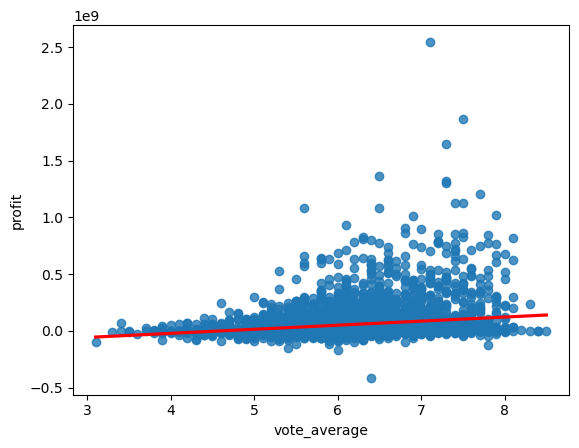

In [58]:
import seaborn as sns

sns.regplot(x = 'vote_average', y = 'profit', data = movies_counted, line_kws = {"color": 'red'})

2. The best movies according to popularity return high profit and revenue.

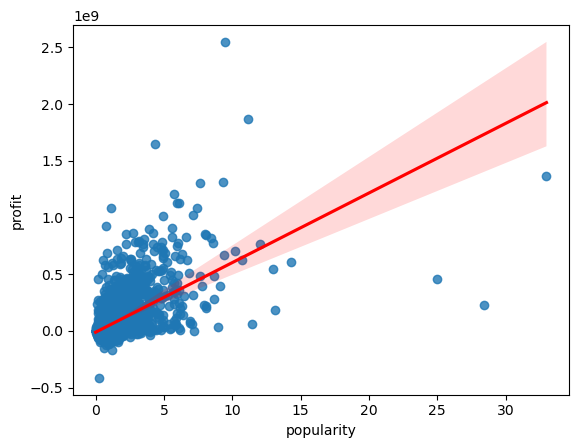

<Figure size 1000x500 with 0 Axes>

In [60]:
import matplotlib.pyplot as plt
sns.regplot(x = 'popularity', y = 'profit', data = movies_counted, line_kws = {"color": 'red'})
plt.figure(figsize = (10,5))
plt.show()

3. Highly budgeted movies return high profit.

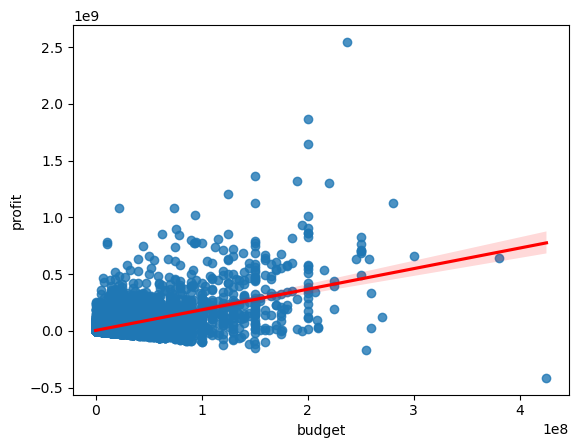

<Figure size 1000x500 with 0 Axes>

In [62]:
sns.regplot(x = 'budget', y = 'profit', data = movies_counted, line_kws = {"color": 'red'})
plt.figure(figsize = (10,5))
plt.show()

4. Highly budgeted mvoies have a high popularity. 

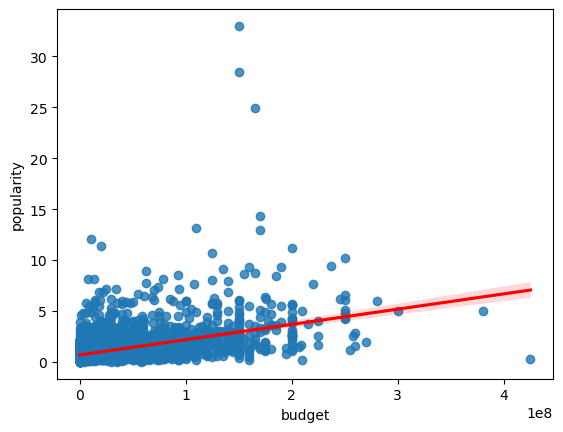

<Figure size 1000x500 with 0 Axes>

In [63]:
sns.regplot(x = 'budget', y = 'popularity', data = movies_counted, line_kws = {"color": 'red'})
plt.figure(figsize = (10,5))
plt.show()

5. Look at the Profit Per Genre Per Year

In [67]:
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,release_year,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,2015,6185,7.100000,228436354,Action


In [71]:
time_genre = pd.DataFrame(movies_genre.groupby(['release_year','genres_split'])['profit'].mean())

In [73]:
final_genre = pd.pivot_table(time_genre, values = 'profit', index = ['genres_split'], columns = ['release_year'])

Text(0.5, 1.0, 'Genres by Profit per Year')

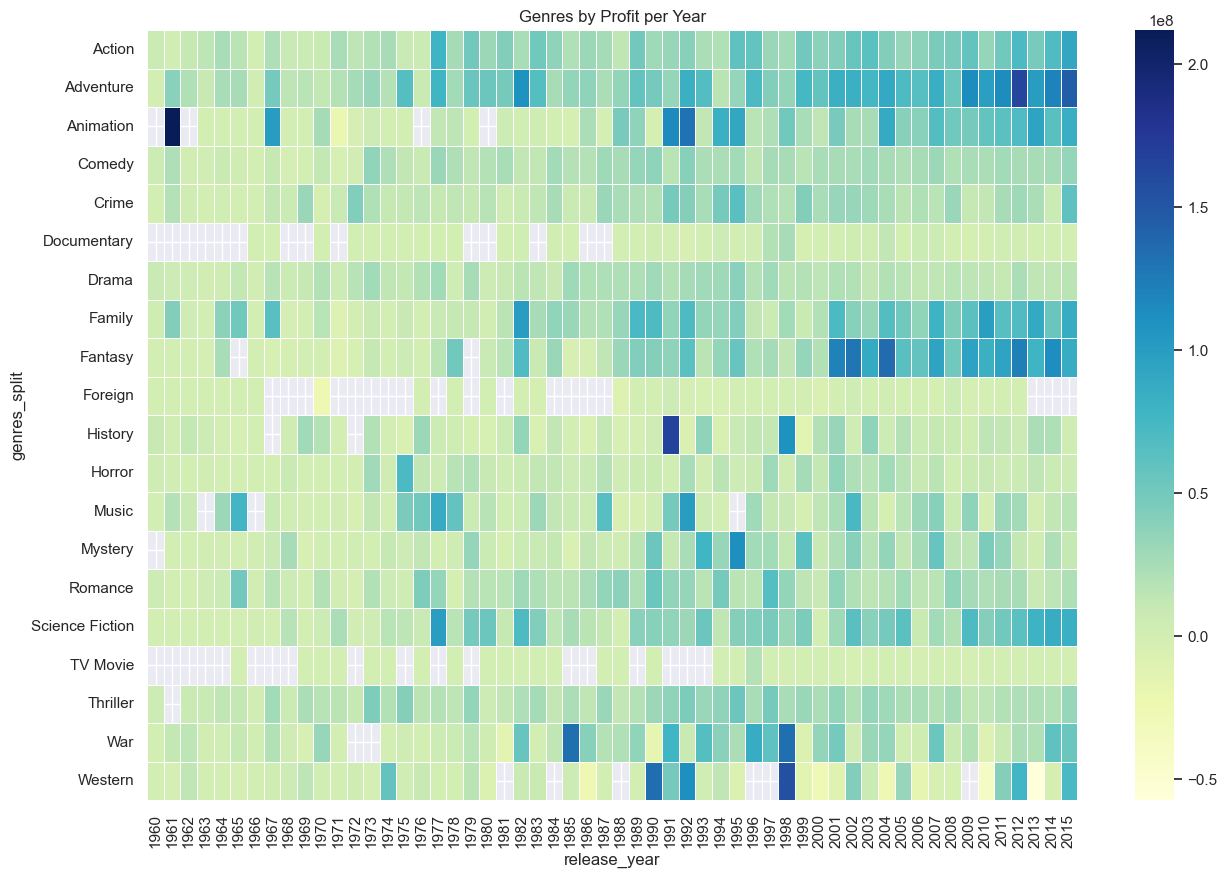

In [78]:
sns.set(rc = {'figure.figsize': (15,10)})
sns.heatmap(final_genre, cmap = 'YlGnBu', linewidths = .5)
plt.title('Genres by Profit per Year')